# ASSIGNMENT 2

PRATIK PRASHANT CHOUGULE,
ROLL NO- 22123011 , kaggle id- pratik_c09

In [1]:
 # INDEX
# 1.importing libraries
# 2.loading of training data
# 3. conversion of training data into pixel format (64*64) and greyscale
# 4. merging of 2 data sets i.e cracked and uncracked 
# 5. training simple model of CNN
# 6. training another model of CNN consisting of BatchNormalisation(), dropout etc to check the change 
# 7. VGG model (final model)
# 8. making orediction of new data (for 2000 images)

# Note: I have tried different models of CNN, to  check how  accuracy chnanges by using different layers of CNN.  the final prediction is based on the best model (VGG16). 
    

In [2]:
#  IMPORTING IMPORTANT LIBRARIES 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
# IMPORTING CRACKED IMAGE DATA FROM SYSTEM(TRAIN DATA)
data_1=os.listdir('C:\\Users\\PRADNYA\\Desktop\\assignment 2 data\\train\\cracked')  # cracked data 

In [10]:
#IMPORTING UNCRACKED IMAGE DATA FROM SYSTEM (TRAIN DATA)
data_2=os.listdir('C:\\Users\\PRADNYA\\Desktop\\assignment 2 data\\train\\uncracked') # uncracked data


# Generating CSV file for cracked images (train) 

In [18]:

from PIL import Image

# Set the source directory for the images and the output CSV file path
source_dir = 'C:\\Users\\PRADNYA\\Desktop\\assignment 2 data\\train\\uncracked'
output_path = 'C:\\Users\\PRADNYA\\Desktop\\assignment 2 data\\train\\uncraracked.csv'

# Initialize an empty list to store the flattened pixel values
data = []

# Loop over the image files in the directory
for file_name in os.listdir(source_dir):
    # Open the image and Convert the image to grayscale
    image = Image.open(os.path.join(source_dir, file_name)).convert('L')

    #  resize it to 64x64 pixels
    gray_image = image.resize((64,64))


    # Convert the image to a numpy array and flatten it to a 1D array
    pixels = np.array(gray_image).flatten()
    # Add the flattened array to the list
    data.append(pixels)

# Create a pandas dataframe from the list of pixel values
df = pd.DataFrame(data)
df.insert(0,'label','uncracked')

# Save the dataframe to a CSV file
df.to_csv(output_path, index=False)


#  same is done for the cracked folder 


# Set the source directory for the images and the output CSV file path
source_dir = 'C:\\Users\\PRADNYA\\Desktop\\assignment 2 data\\train\\cracked'
output_path = 'C:\\Users\\PRADNYA\\Desktop\\assignment 2 data\\train\\craracked.csv'

# Initialize an empty list to store the flattened pixel values
data = []

# Loop over the image files in the directory
for file_name in os.listdir(source_dir):
    # Open the image and Convert the image to grayscale 
    image = Image.open(os.path.join(source_dir, file_name)).convert('L')

    # resize it to 64x64 pixels
    gray_image = image.resize((64,64))


    # Convert the image to a numpy array and flatten it to a 1D array
    pixels = np.array(gray_image).flatten()
    # Add the flattened array to the list
    data.append(pixels)

# Create a pandas dataframe from the list of pixel values
df = pd.DataFrame(data)
df.insert(0,'label','cracked')

# Save the dataframe to a CSV file
df.to_csv(output_path, index=False)



In [19]:
import pandas as pd
import numpy as np
# Load the two CSV files into separate Pandas dataframes
df1 = pd.read_csv("C:\\Users\\PRADNYA\\Desktop\\assignment 2 data\\train\\craracked.csv")  #cracked
df2 = pd.read_csv("C:\\Users\\PRADNYA\\Desktop\\assignment 2 data\\train\\uncraracked.csv") # uncracked


In [22]:
# merged_df = pd.concat([df1, df2], axis=0, ignore_index=True)
merged_df = pd.concat([df1, df2], axis=0, ignore_index=True)

merged_df.to_csv("C:\\Users\\PRADNYA\\Desktop\\assignment 2 data\\train\\merged_file.csv", index=False)

In [23]:

# Shuffle the rows of the merged dataframe using np.random.permutation method:
shuffled_df = merged_df.reindex(np.random.permutation(merged_df.index))



# importing all the libraries for CNN model

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


In [71]:
#  randomly mixing the 2 CSV files
dff = pd.read_csv("C:\\Users\\PRADNYA\\Desktop\\assignment 2 data\\train\\mixed_file.csv")


In [72]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14968 entries, 0 to 14967
Columns: 4097 entries, label to 4095
dtypes: int64(4096), object(1)
memory usage: 467.9+ MB


In [73]:
#  check for if there is any null| missing values

null_values = dff.isna().sum()
print(null_values)

label    0
0        0
1        0
2        0
3        0
        ..
4091     0
4092     0
4093     0
4094     0
4095     0
Length: 4097, dtype: int64


In [74]:
missing_values = df.isnull().sum()
print(missing_values)

label    0
0        0
1        0
2        0
3        0
        ..
4091     0
4092     0
4093     0
4094     0
4095     0
Length: 4097, dtype: int64


<AxesSubplot: xlabel='label', ylabel='count'>

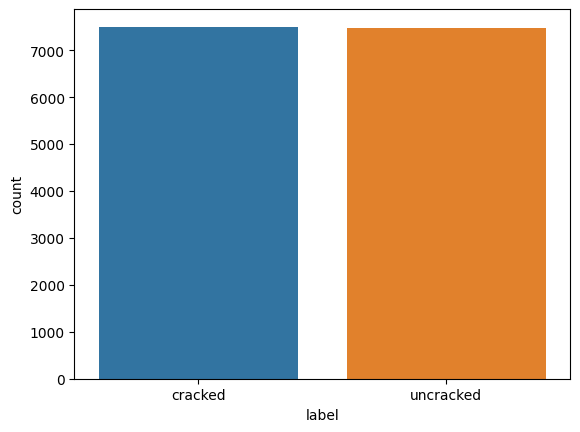

In [164]:
# counting the no of datasets available in folder   

sns.countplot(x='label', data=dff)

# there are approx same no of samples in dataset of "cracked and uncracked " # NO CLASS IMBALANCE


In [48]:
# print(dff.drop('label', axis=1).values.shape)

(14968, 4096)


In [75]:
y = dff['label']
X=dff.drop(['label'],axis=1)

In [76]:
y



0          cracked
1        uncracked
2          cracked
3          cracked
4        uncracked
           ...    
14963      cracked
14964      cracked
14965    uncracked
14966    uncracked
14967    uncracked
Name: label, Length: 14968, dtype: object

In [77]:
X

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,72,74,70,63,62,70,70,69,77,89,...,71,84,82,77,77,64,61,64,71,75
1,163,176,174,174,175,177,173,181,176,154,...,166,168,168,164,166,166,170,172,165,162
2,156,169,173,174,172,169,171,177,178,171,...,181,181,183,206,185,188,189,143,76,170
3,180,190,197,184,192,167,176,189,186,186,...,170,174,181,175,200,177,191,188,194,192
4,172,165,165,168,168,167,169,170,167,169,...,160,168,166,167,161,163,165,168,166,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14963,179,180,183,181,180,183,183,176,172,172,...,175,172,176,174,174,172,177,177,172,176
14964,183,179,184,186,185,186,186,183,181,181,...,192,182,182,187,193,182,169,182,186,186
14965,180,180,181,182,182,186,185,186,181,180,...,184,183,186,186,183,185,190,190,189,185
14966,101,156,171,178,160,155,144,140,147,136,...,168,168,175,171,168,170,159,139,160,159


In [78]:
X = dff.drop('label', axis=1).values.reshape(-1, 64, 64, 1)

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Assuming y contains categorical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
onehot_encoder = OneHotEncoder(sparse=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))



# # Check the shapes of the arrays
# print("Shape of X_train:", X_train.shape)
# print("Shape of y_train:", y_train.shape)
# print("Shape of X_test:", X_test.shape)
# print("Shape of y_test:", y_test.shape)


C:\PYTHON 3.10\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [80]:
# # Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

In [82]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

y_test = to_categorical(y_test)


In [92]:
y_train

array([[[0., 1.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.]],

       [[0., 1.],
        [1., 0.]],

       ...,

       [[0., 1.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]], dtype=float32)

In [93]:
X_train

array([[[[180],
         [178],
         [179],
         ...,
         [184],
         [181],
         [177]],

        [[182],
         [180],
         [180],
         ...,
         [183],
         [181],
         [182]],

        [[181],
         [181],
         [181],
         ...,
         [176],
         [179],
         [178]],

        ...,

        [[180],
         [180],
         [178],
         ...,
         [174],
         [176],
         [173]],

        [[178],
         [178],
         [179],
         ...,
         [176],
         [174],
         [174]],

        [[177],
         [180],
         [180],
         ...,
         [177],
         [177],
         [179]]],


       [[[180],
         [177],
         [173],
         ...,
         [177],
         [178],
         [181]],

        [[183],
         [174],
         [172],
         ...,
         [178],
         [185],
         [181]],

        [[176],
         [171],
         [174],
         ...,
         [183],
         [

# Trying simple model OF CNN 

In [111]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))


In [112]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 12544)             0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [113]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))


In [115]:
history = model.fit(X_train, y_train[:,:,1], batch_size=32, epochs=15, validation_data=(X_test, y_test[:,:,1]))

Epoch 1/15
375/375 [==============================] - 32s 85ms/step - loss: 0.6743 - accuracy: 0.5500 - val_loss: 0.6982 - val_accuracy: 0.5107
Epoch 2/15
375/375 [==============================] - 32s 86ms/step - loss: 0.6774 - accuracy: 0.5461 - val_loss: 0.7539 - val_accuracy: 0.5084
Epoch 3/15
375/375 [==============================] - 33s 88ms/step - loss: 0.6755 - accuracy: 0.5457 - val_loss: 0.7106 - val_accuracy: 0.5217
Epoch 4/15
375/375 [==============================] - 33s 87ms/step - loss: 0.6703 - accuracy: 0.5501 - val_loss: 0.7073 - val_accuracy: 0.5321
Epoch 5/15
375/375 [==============================] - 33s 89ms/step - loss: 0.6632 - accuracy: 0.5594 - val_loss: 0.7055 - val_accuracy: 0.5334
Epoch 6/15
375/375 [==============================] - 33s 88ms/step - loss: 0.6625 - accuracy: 0.5595 - val_loss: 0.7059 - val_accuracy: 0.5251
Epoch 7/15
375/375 [==============================] - 33s 87ms/step - loss: 0.6869 - accuracy: 0.5225 - val_loss: 0.6985 - val_accuracy:

# for this model the training and testing accuracy is very low, seems like it is model iss underfitted

# another model ,  introducing  batchnormalisation,Droupoutfor the model improvement 



In [133]:
from tensorflow.keras.layers import Dense, BatchNormalization

from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

model_1 = Sequential()

model_1.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(64,64,1)))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model_1.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model_1.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model_1.add(Flatten())

model_1.add(Dense(128,activation='relu'))
model_1.add(Dropout(0.1))
model_1.add(Dense(64,activation='relu'))
model_1.add(Dropout(0.1))
model_1.add(Dense(2,activation='sigmoid')) 



In [134]:
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 batch_normalization_9 (Batc  (None, 62, 62, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_10 (Bat  (None, 29, 29, 64)       256       
 chNormalization)                                                
                                                     

In [135]:
# model_1.compile(loss='binary_crossentropy'= for bineary , optimizer='adam', metrics=['accuracy'])
model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [136]:
history = model_1.fit(X_train, y_train[:,:,1], batch_size=32, epochs=25, validation_data=(X_test, y_test[:,:,1]))

Epoch 1/25
375/375 [==============================] - 52s 136ms/step - loss: 0.7389 - accuracy: 0.6026 - val_loss: 0.6561 - val_accuracy: 0.6186
Epoch 2/25
375/375 [==============================] - 48s 128ms/step - loss: 0.6534 - accuracy: 0.6298 - val_loss: 0.6714 - val_accuracy: 0.5721
Epoch 3/25
375/375 [==============================] - 49s 131ms/step - loss: 0.6263 - accuracy: 0.6408 - val_loss: 0.6450 - val_accuracy: 0.6152
Epoch 4/25
375/375 [==============================] - 49s 132ms/step - loss: 0.6025 - accuracy: 0.6655 - val_loss: 0.6827 - val_accuracy: 0.5341
Epoch 5/25
375/375 [==============================] - 49s 131ms/step - loss: 0.5889 - accuracy: 0.6738 - val_loss: 0.6664 - val_accuracy: 0.5635
Epoch 6/25
375/375 [==============================] - 50s 133ms/step - loss: 0.5694 - accuracy: 0.6930 - val_loss: 1.0039 - val_accuracy: 0.5140
Epoch 7/25
375/375 [==============================] - 49s 131ms/step - loss: 0.5360 - accuracy: 0.7215 - val_loss: 0.7405 - val_ac

In [182]:
# Evaluate the model on the test data
test_loss, test_acc = model_1.evaluate(X_test, y_test[:,:,1], verbose=2)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


94/94 - 3s - loss: 1.8127 - accuracy: 0.6710 - 3s/epoch - 32ms/step
Test loss: 1.8126710653305054
Test accuracy: 0.6710087060928345


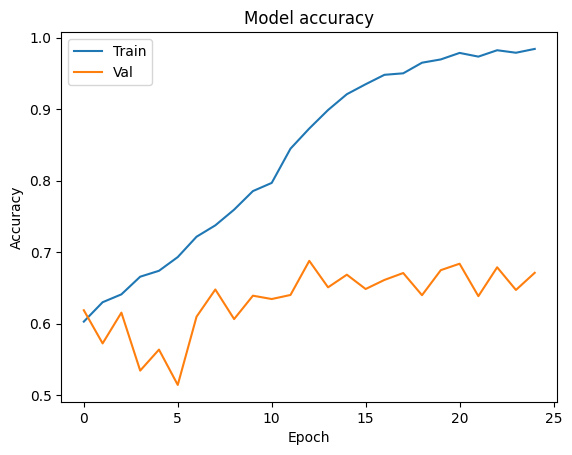

In [137]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# training accuracy is incresed and test accuracy is very low , this are the signs of OVERFITTED model 

# VGG16 MODEL 

we are using VGG model beacuse,The VGG model of CNN is often used as a feature extractor for transfer learning in computer vision tasks due to its excellent performance on image classification tasks and its simple architecture consisting of stacked convolutional layers with small filters. Its use can lead to better accuracy and faster convergence compared to training a model from scratch, especially when the size of the dataset is limited.

In [6]:
import numpy as np
import pandas as pd
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load data from CSV file
data = pd.read_csv('C:\\Users\\PRADNYA\\Desktop\\assignment 2 data\\train\\mixed_file.csv')
X_gray = data.iloc[:, 1:].values.reshape(-1, 64, 64, 1) # reshape to (n_samples, height, width, channels)
X = np.concatenate([X_gray]*3, axis=-1) # duplicate grayscale channel to create pseudo-RGB images
y = data.iloc[:, 0].values

# Convert string labels to numeric labels using label encoding
le = LabelEncoder()
y = le.fit_transform(y)

# Convert numeric labels to one-hot encoding
ohe = OneHotEncoder(sparse=False)
y = ohe.fit_transform(y.reshape(-1, 1))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Add custom top layers for grayscale image classification
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = Dense(128, activation='relu')(x)
predictions = Dense(len(le.classes_), activation='softmax')(x)

# Create a new model with custom top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate model on test set
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


C:\PYTHON 3.10\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
375/375 [==============================] - 140s 372ms/step - loss: 0.6876 - accuracy: 0.7184 - val_loss: 0.5362 - val_accuracy: 0.7285
Epoch 2/10
375/375 [==============================] - 142s 379ms/step - loss: 0.4776 - accuracy: 0.7678 - val_loss: 0.4889 - val_accuracy: 0.7655
Epoch 3/10
375/375 [==============================] - 144s 385ms/step - loss: 0.4581 - accuracy: 0.7789 - val_loss: 0.5301 - val_accuracy: 0.7341
Epoch 4/10
375/375 [==============================] - 146s 390ms/step - loss: 0.4302 - accuracy: 0.7923 - val_loss: 0.5031 - val_accuracy: 0.7672
Epoch 5/10
375/375 [==============================] - 147s 392ms/step - loss: 0.4192 - accuracy: 0.7966 - val_loss: 0.5149 - val_accuracy: 0.7502
Epoch 6/10
375/375 [==============================] - 147s 392ms/step - loss: 0.3955 - accuracy: 0.8085 - val_loss: 0.5141 - val_accuracy: 0.7715
Epoch 7/10
375/375 [==============================] - 145s 387ms/step - loss: 0.3852 - accuracy: 0.8148 - val_loss: 0.5559 -

# Test loss: 0.5571762323379517


# Test accuracy: 0.7605210542678833

# calculating F1 score .

In [2]:
from sklearn.metrics import f1_score

# Predict labels for test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score:', f1)


94/94 [==============================] - 35s 369ms/step
F1 score: 0.7459576926232551


# F1 score: 0.75

# confusion matrix 

94/94 [==============================] - 35s 360ms/step


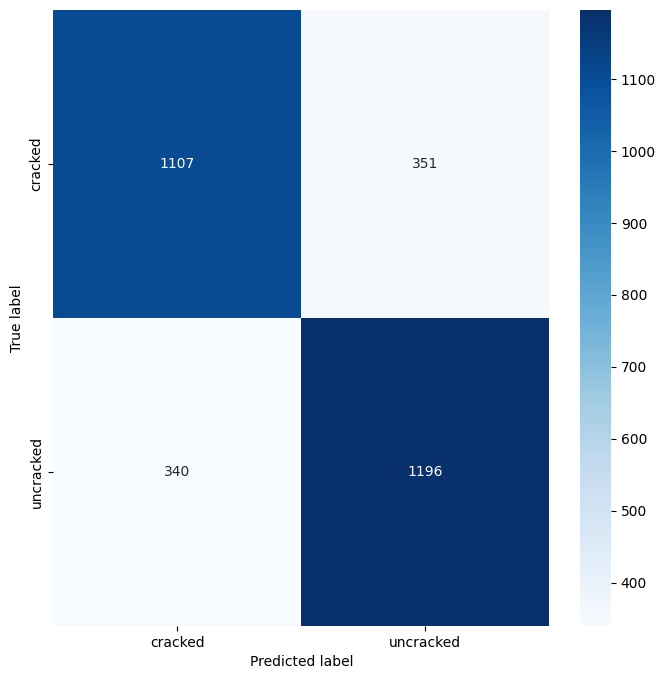

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict labels for test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='g', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


Epoch 1/10
375/375 [==============================] - 173s 461ms/step - loss: 0.3375 - accuracy: 0.8392 - val_loss: 0.5682 - val_accuracy: 0.7682
Epoch 2/10
375/375 [==============================] - 173s 461ms/step - loss: 0.3311 - accuracy: 0.8411 - val_loss: 0.5567 - val_accuracy: 0.7672
Epoch 3/10
375/375 [==============================] - 174s 464ms/step - loss: 0.3155 - accuracy: 0.8524 - val_loss: 0.5921 - val_accuracy: 0.7595
Epoch 4/10
375/375 [==============================] - 178s 475ms/step - loss: 0.3063 - accuracy: 0.8577 - val_loss: 0.6331 - val_accuracy: 0.7602
Epoch 5/10
375/375 [==============================] - 176s 469ms/step - loss: 0.3031 - accuracy: 0.8597 - val_loss: 0.6360 - val_accuracy: 0.7639
Epoch 6/10
375/375 [==============================] - 175s 466ms/step - loss: 0.2920 - accuracy: 0.8632 - val_loss: 0.6580 - val_accuracy: 0.7659
Epoch 7/10
375/375 [==============================] - 172s 460ms/step - loss: 0.2810 - accuracy: 0.8677 - val_loss: 0.6831 -

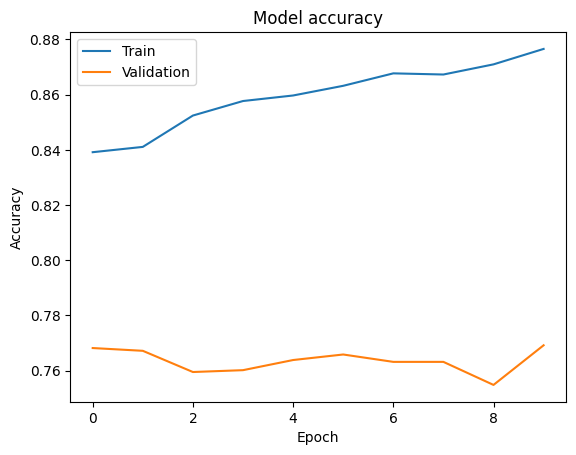

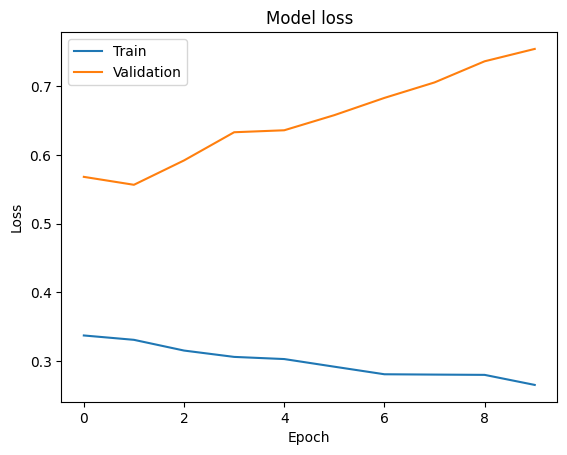

In [8]:
import matplotlib.pyplot as plt

# Train model and collect history
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




# for the above VGG model the training accuracy is almost equal to 85 % and test accuracy is amlost equal to 78 %


In [9]:
#  saving our VGG model 
model.save('vgg_model.h5')  


In [10]:
from keras.models import load_model

model = load_model('vgg_model.h5')


In [31]:
# lets convert the prediction images into the grey scale(TEST FOLDER DATA)

from PIL import Image

 
# Set the source directory for the images and the output CSV file path
source_dir = 'C:\\Users\\PRADNYA\\Desktop\\assignment 2 data\\test'
output_path = 'C:\\Users\\PRADNYA\\Desktop\\assignment 2 data\\train\\test_data_incsv.csv'

# Initialize an empty list to store the flattened pixel values
data = []
   
# Loop over the image files in the directory
for file_name in os.listdir(source_dir):
    # Open the image and resize it to 64*64 pixels,Convert the image to grayscale
    image = Image.open(os.path.join(source_dir, file_name)).convert('L')

    
    gray_image = image.resize((64,64))


    # Convert the image to a numpy array and flatten it to a 1D array
    pixels = np.array(gray_image).flatten()
    # Add the flattened array to the list
    data.append(pixels)

# Create a pandas dataframe from the list of pixel values
df = pd.DataFrame(data)


# Save the dataframe to a CSV file
df.to_csv(output_path, index=False)


In [64]:


# Load the saved model
model = load_model('vgg_model.h5')


In [68]:
# # Save the predictions to a CSV file 
# df.to_csv('C:\\Users\\PRADNYA\\Desktop\\assignment 2 data\\train\\predictions_4.csv', index=False)


In [70]:


# Set the source directory for the images and the output CSV file path
source_dir = 'C:\\Users\\PRADNYA\\Desktop\\assignment 2 data\\test'
output_path = 'C:\\Users\\PRADNYA\\Desktop\\assignment 2 data\\train\\testing_new'

# Initialize an empty list to store the flattened pixel values
data = []

# Loop over the image files in the directory
for i in range(1, 2001):
    # Open the image and resize it to 64*64 pixels
    file_name = f'{i}.jpg'
    image = Image.open(os.path.join(source_dir, file_name)).convert('L')

    # Convert the image to grayscale
    gray_image = image.resize((64,64))

    # Convert the image to a numpy array and flatten it to a 1D array
    pixels = np.array(gray_image).flatten()
    # Add the flattened array to the list
    data.append(pixels)



In [79]:
# Create a pandas dataframe from the list of pixel values
df = pd.DataFrame(data)
df.insert(0,'Image',['{}.jpg'.format(i) for i in range(1,2001)])

# Load the model
model = load_model('vgg_model.h5')

# Reshape the data for input to the model
X_gray = df.iloc[:,1:].values.reshape(-1,64,64,1)
X = np.concatenate([X_gray]*3, axis=-1)




In [83]:
# Making final  predictions on the test data
predictions = model.predict(X)
labels = ['Cracked' if prediction[0] > prediction[1] else 'Uncracked' for prediction in predictions]

# Create a Pandas DataFrame with the predictions
df = pd.DataFrame({'Image': df['Image'], 'class': labels})

# Save the predictions to a CSV file
df.to_csv('C:\\Users\\PRADNYA\\Desktop\\assignment 2 data\\train\\final_list_2.csv', index=False)

63/63 [==============================] - 82s 1s/step


In [2]:
# reding our newly generated file 

df = pd.read_csv('C:\\Users\\PRADNYA\\Desktop\\assignment 2 data\\train\\final_list_2.csv')


# generating count plot using sns librabry to check how many cracked and uncracked images are there according to our model .

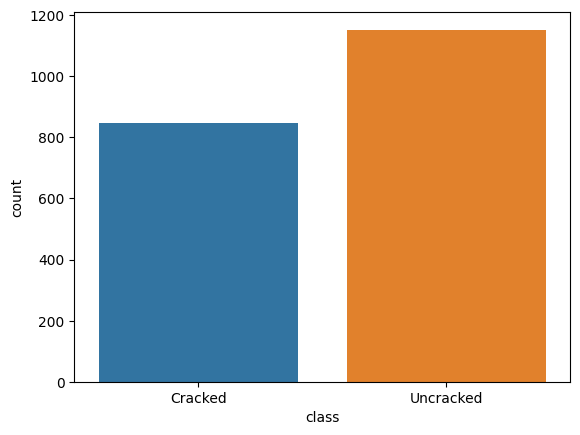

In [3]:
sns.countplot(x='class', data=df)
plt.show()
